This is a dataset of 11,228 newswires from Reuters, labeled over 46 topics.

Each newswire is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

Arguments

- num_words: integer or None. Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data. If None, all words are kept. Defaults to None, so all words are kept.

- maxlen: int or None. Maximum sequence length. Any longer sequence will be truncated. Defaults to None, which means no truncation.
- test_split: Float between 0 and 1. Fraction of the dataset to be used as test data. Defaults to 0.2, meaning 20% of the dataset is used as test data.

Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

- x_train, x_test: lists of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words - 1. If the maxlen argument was specified, the largest possible sequence length is maxlen.

- y_train, y_test: lists of integer labels.

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation, Input
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

2024-11-28 12:50:43.618075: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train.shape

(1395,)

In [3]:
len(X_train[10])

38

In [4]:
y_train.shape

(1395,)

In [5]:
X_train[1:5]

array([list([1, 486, 341, 785, 26, 14, 482, 26, 255, 606, 252, 83, 146, 91, 102, 17, 12]),
       list([1, 245, 273, 397, 124, 53, 191, 26, 14, 83, 26, 39, 32, 32, 11, 14, 19, 12, 11, 88, 279, 59, 11, 14, 472, 59, 11, 17, 12]),
       list([1, 53, 745, 26, 14, 722, 26, 39, 7442, 18, 14, 6353, 18, 88, 258, 44, 11, 14, 119, 70, 11, 17, 12]),
       list([1, 486, 341, 119, 26, 14, 119, 26, 7, 255, 346, 606, 252, 83, 146, 91, 272, 17, 12])],
      dtype=object)

In [6]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')


In [7]:
X_train.shape

(1395, 49)

In [8]:
y_train[30]

np.int64(9)

In [9]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [10]:
X_train.shape

(1395, 49, 1)

In [11]:
y_data = np.concatenate((y_train, y_test))
len(np.unique(y_data))

35

In [12]:
y_data = to_categorical(y_data)
y_train = y_data[:1395]
y_test = y_data[1395:]

In [13]:
y_train[30]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:

# Define the RNN model
def vanilla_rnn():
    model = Sequential()
    model.add(Input(shape=(49, 1)))  # Explicit Input layer
    model.add(SimpleRNN(50, return_sequences=False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model



In [16]:
# Instantiate and compile the model
model = vanilla_rnn()

# Fit the model directly
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test), 
    epochs=200, 
    batch_size=50, 
    verbose=1
)

Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.2788 - loss: 3.5975 - val_accuracy: 0.6611 - val_loss: 2.2077
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6439 - loss: 1.9551 - val_accuracy: 0.6995 - val_loss: 1.3154
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6751 - loss: 1.3721 - val_accuracy: 0.7479 - val_loss: 1.1774
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7063 - loss: 1.2570 - val_accuracy: 0.7479 - val_loss: 1.1517
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7221 - loss: 1.1406 - val_accuracy: 0.7479 - val_loss: 1.1513
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7232 - loss: 1.1449 - val_accuracy: 0.7479 - val_loss: 1.1469
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7231 - loss: 1.1411 - val_accuracy: 0.7479 - val_loss: 1.1389
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7007 - loss: 1.1779 - val_accuracy: 0.747

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7070 - loss: 1.0364 - val_accuracy: 0.7462 - val_loss: 1.0730
Epoch 52/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6995 - loss: 1.0452 - val_accuracy: 0.7462 - val_loss: 1.0783
Epoch 53/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7063 - loss: 1.0366 - val_accuracy: 0.7462 - val_loss: 1.0709
Epoch 54/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7035 - loss: 1.0102 - val_accuracy: 0.7462 - val_loss: 1.0786
Epoch 55/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7291 - loss: 0.9076 - val_accuracy: 0.7513 - val_loss: 1.0756
Epoch 56/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7187 - loss: 0.9536 - val_accuracy: 0.7546 - val_loss: 1.0622
Epoch 57/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7091 - loss: 0.9891 - val_accuracy: 0.7479 - val_loss: 1.0591
Epoch 58/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7342 - loss: 0.9561 - val_accuracy: 0.7396 -

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7263 - loss: 0.8852 - val_accuracy: 0.7529 - val_loss: 1.0403
Epoch 102/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7511 - loss: 0.8334 - val_accuracy: 0.7396 - val_loss: 1.0579
Epoch 103/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7219 - loss: 0.9008 - val_accuracy: 0.7596 - val_loss: 1.0805
Epoch 104/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7326 - loss: 0.8746 - val_accuracy: 0.7563 - val_loss: 1.0365
Epoch 105/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7533 - loss: 0.8332 - val_accuracy: 0.7613 - val_loss: 1.0622
Epoch 106/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7261 - loss: 0.8448 - val_accuracy: 0.7462 - val_loss: 1.1278
Epoch 107/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7406 - loss: 0.8935 - val_accuracy: 0.7496 - val_loss: 1.0370
Epoch 108/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7330 - loss: 0.8984 - val_accuracy: 

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7461 - loss: 0.8397 - val_accuracy: 0.7529 - val_loss: 1.0637
Epoch 152/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7481 - loss: 0.8479 - val_accuracy: 0.7579 - val_loss: 1.0752
Epoch 153/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7464 - loss: 0.8162 - val_accuracy: 0.7429 - val_loss: 1.1095
Epoch 154/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7207 - loss: 0.9127 - val_accuracy: 0.7479 - val_loss: 1.1341
Epoch 155/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7255 - loss: 0.9619 - val_accuracy: 0.7362 - val_loss: 1.1068
Epoch 156/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7397 - loss: 0.8697 - val_accuracy: 0.7462 - val_loss: 1.1103
Epoch 157/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7326 - loss: 0.8622 - val_accuracy: 0.7529 - val_loss: 1.0764
Epoch 158/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7339 - loss: 0.8387 - val_accuracy: 

In [17]:
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


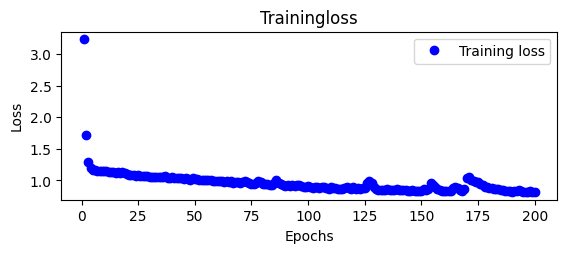

/tmp/ipykernel_13637/1832144031.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


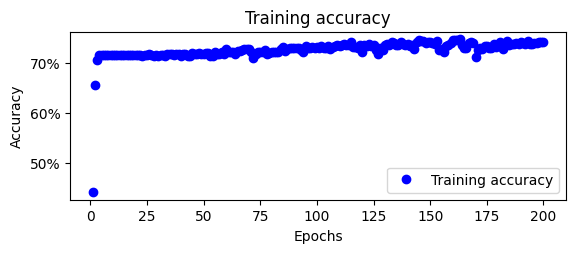

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
history_dict = history.history
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']

epochs = range(1, len(loss_values) + 1)
import matplotlib.ticker as mtick
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid(False)
plt.show()

In [19]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])